# Задача о возможном повышении сотрудника 
## 0. Описание задачи

В данном датасете содержатся данные о наемных работниках.
Некоторое колличество человек каждый год получают продвижение по службе (примерно 5%). Задача заключается в определении достоин ли сотрудник получить повышение или нет на основе доступных данных.

Столбцы:  
* employee_id - идентификатор работника
* department - наименование департамента, куда рассматривалась кандидатура потенциального сотрудника
* region - наименование (обезличенное) региона, откуда поступила кандидатура;
* education - образование кандидиата (бакалавр, магистр, и т.д.);
* gender - пол (муж/жен) кандидата;
* recruitment_channel - канал подбора персонала;
* no_of_trainings - количество пройденных курсов
* age - возраст
* previous_year rating - рейтинг сотрудника за прошлый год
* length_of_service - стаж 
* KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ?
* awards_won ? - является ли победитель номинаций/конкурсов
* avg_training_score - средний балл по пройденным курсам
* is_promoted - было ли повышение

## 1. Чтение данных

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
#%matplotlib inline 

import pandas as pd             
import seaborn as sns           
import sklearn                  

data = pd.read_csv('train.csv', sep = ',', engine = 'python')
display(data)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [2]:
shape = data.shape
print(f"Размер датафрейма:{shape}")

Размер датафрейма:(54808, 14)


## 2. Вычисление основных характеристик, визуализация

In [3]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Корреляционная матрица

In [4]:
corr_mat = data.corr()
corr_mat

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


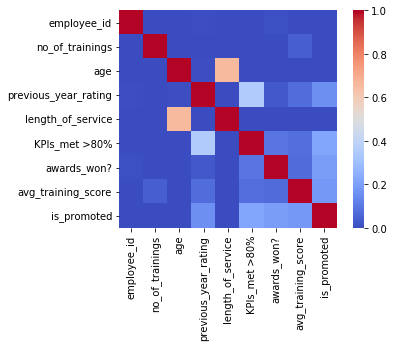

In [5]:
sns.heatmap(corr_mat, square=True, vmin=0, vmax=1, cmap='coolwarm')
pass

### Интерпретация результатов
Из результатов можно видеть, что age корелирует с length_of_service, прямая зависимость.  
Также можно видеть зависимость между KPIs_met >80% и previous_year_rating.  
Наиболее значимые признаки для повышения - previous_year_rating, KPIs_met >80%, awards_won? и avg_training_score

## 3. Обработка пропущенных значений

In [6]:
na_series = data.isna().sum()
print(f"Наличие NaN в столбцах: \n{na_series}")
na_total_count = na_series.values.sum()
print(f"Всего пропущенных значений в датафрейме: {na_total_count}, {100*na_total_count/shape[0]:.2f}%")

Наличие NaN в столбцах: 
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
Всего пропущенных значений в датафрейме: 6533, 11.92%


In [7]:
data.fillna(data.median(numeric_only = True, axis = 0), axis=0 , inplace=True)
data['education'].fillna(data['education'].mode().iloc[0], inplace=True)

print(f"Теперь пропущенных значений нет: \n{data.isna().sum()}")

Теперь пропущенных значений нет: 
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


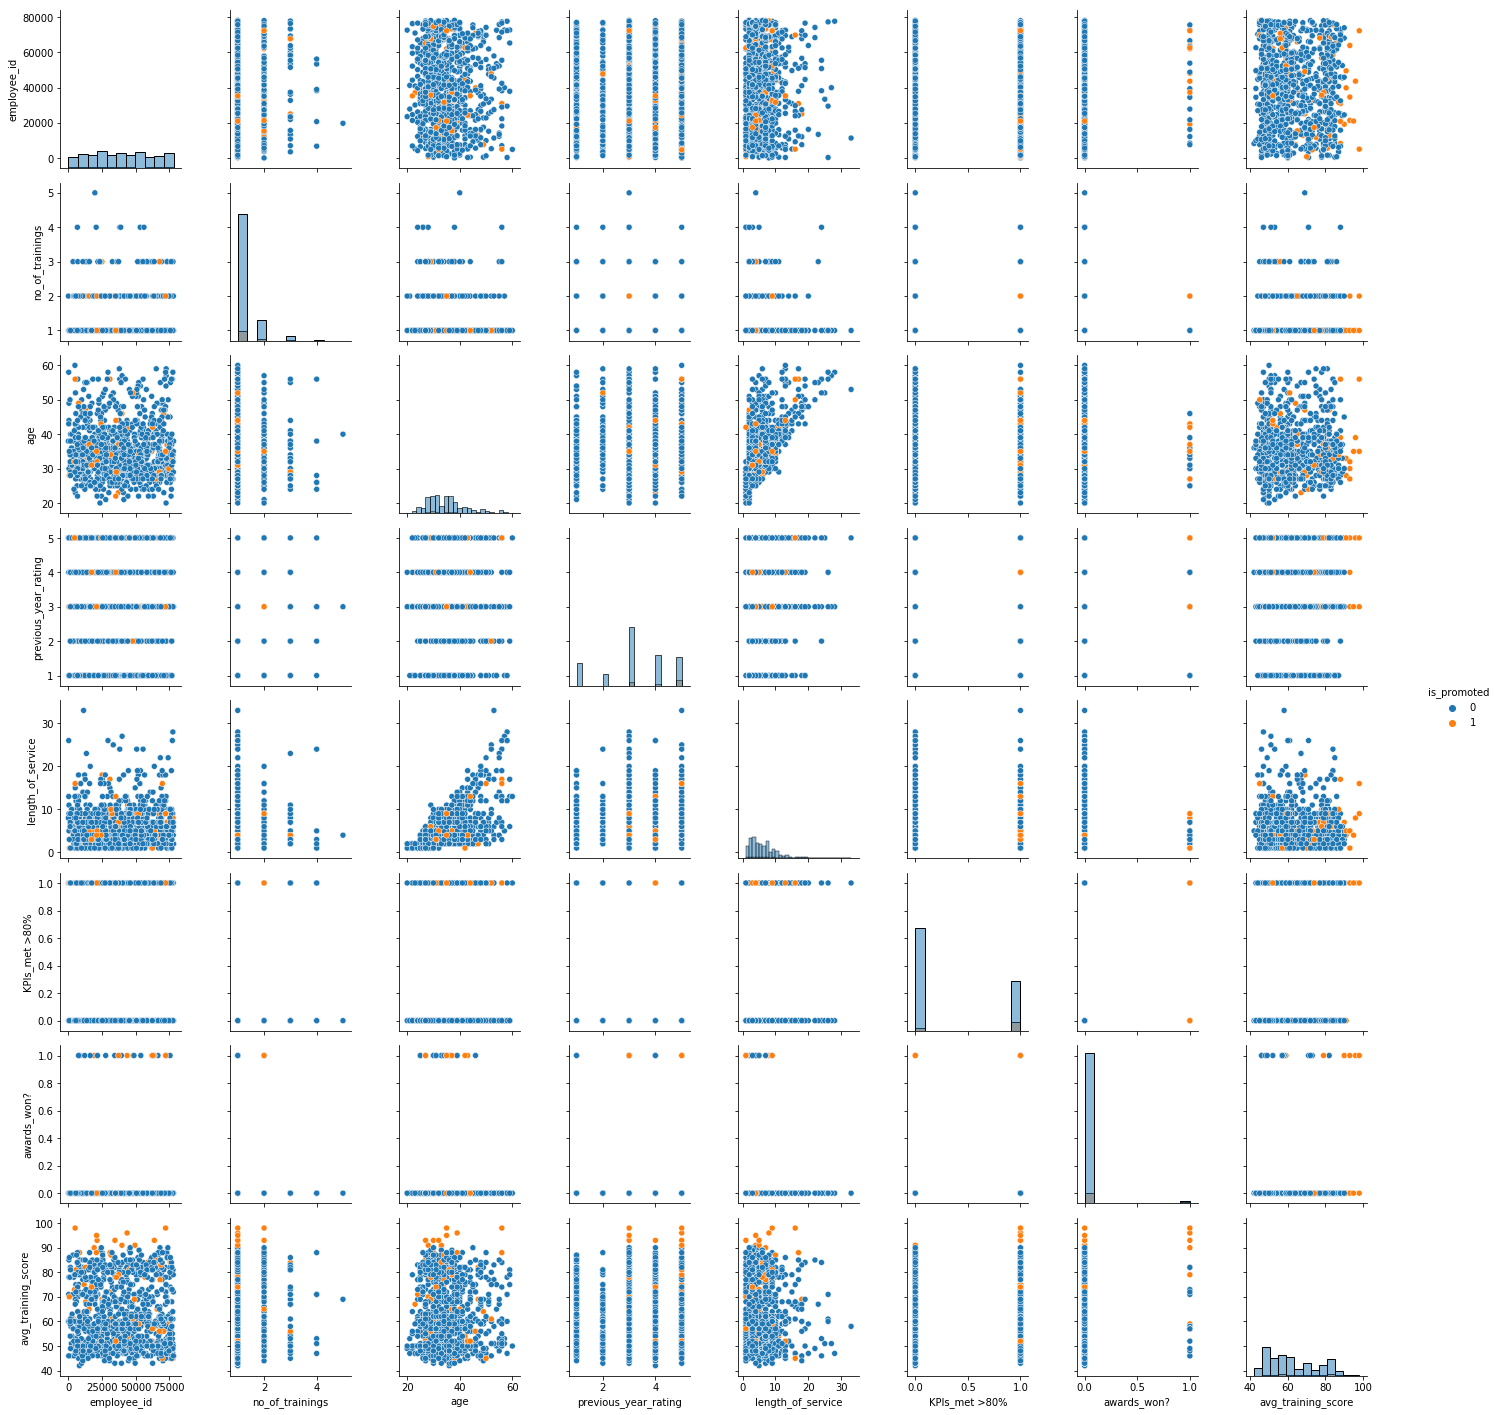

In [8]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue='is_promoted', diag_kind='hist')
pass

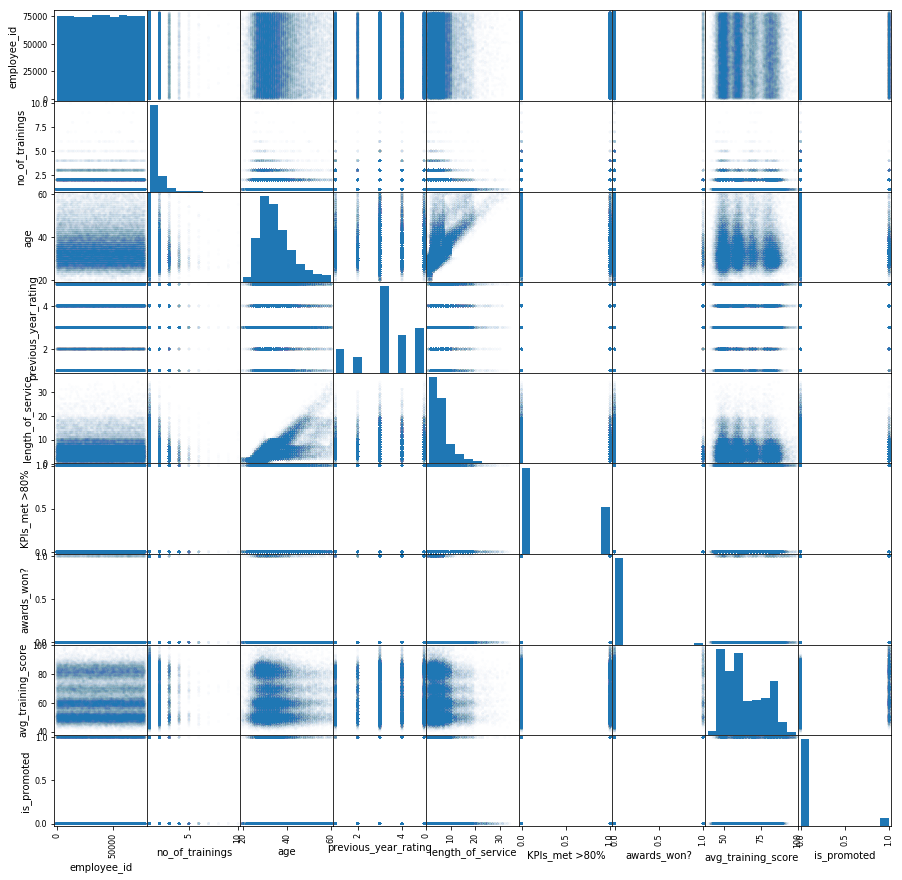

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

## 4. Обработка категориальных признаков

In [10]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [11]:
data.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


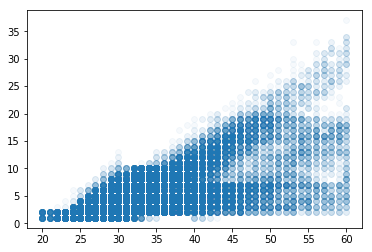

In [12]:
for coll in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
    data[coll] = data[coll].astype('category')

plt.scatter(data['age'], data['length_of_service'], alpha = .04)
pass

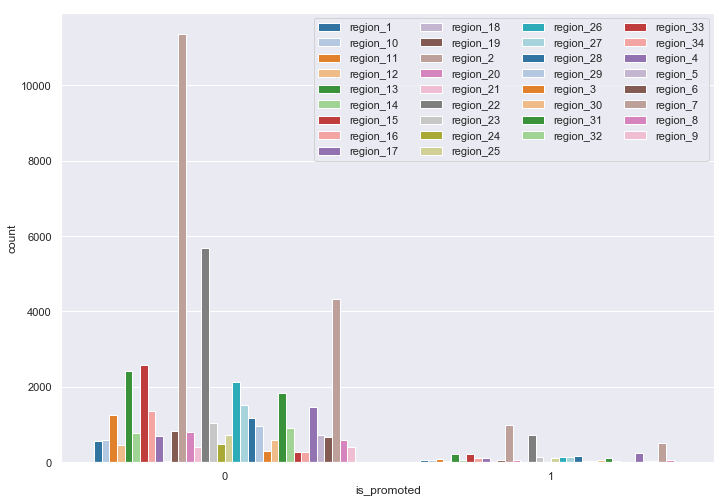

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='is_promoted', hue = 'region', palette = 'tab20', data = data)
plt.legend(ncol=4, loc='upper right')
pass

### Категориальные признаки

In [14]:
data['gender'] = data['gender'].cat.codes

Department_dummies = pd.get_dummies(data['department'], prefix = 'department')
Education_dummies = pd.get_dummies(data['education'], prefix = 'education')
Recruitment_channel_dummies = pd.get_dummies(data['recruitment_channel'], prefix = 'recruitment_channel')
Region_dummies = pd.get_dummies(data['region'])

data = pd.concat((data, Department_dummies), axis=1)
data = data.drop(['department'], axis=1)

data = pd.concat((data, Education_dummies), axis=1)
data = data.drop(['education'], axis=1)

data = pd.concat((data, Recruitment_channel_dummies), axis=1)
data = data.drop(['recruitment_channel'], axis=1)

data = pd.concat((data, Region_dummies), axis=1)
data = data.drop(['region'], axis=1)

data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Нормализация данных

In [15]:
data_stand = (data - data.min(axis = 0))/(data.max(axis = 0)-data.min(axis = 0))
data_stand.describe()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,...,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.500592,0.702379,0.028112,0.370098,0.576120,0.135153,0.351974,0.023172,0.406446,0.085170,...,0.035305,0.017242,0.004908,0.005328,0.031072,0.013976,0.012589,0.088363,0.011951,0.007663
std,0.288473,0.457216,0.067696,0.191504,0.303692,0.118475,0.477590,0.150450,0.222859,0.279137,...,0.184551,0.130173,0.069886,0.072797,0.173514,0.117392,0.111495,0.283825,0.108666,0.087204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251207,0.000000,0.000000,0.225000,0.500000,0.055556,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500971,1.000000,0.000000,0.325000,0.500000,0.111111,0.000000,0.000000,0.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750086,1.000000,0.000000,0.475000,0.750000,0.166667,1.000000,0.000000,0.616667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data_stand.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0.835754,0.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.831960,1.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095942,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.032453,1.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625107,1.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. Разбиение данных на обучающую и тестовые выборки

In [17]:
data_stand.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'region_1', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_2', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_31', 'region_32', 'region_33

In [18]:
data_stand.isna().sum()

employee_id                     0
gender                          0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Bachelor's            0
education_Below Secondary       0
education_Master's & above      0
recruitment_channel_other       0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
region_1                        0
region_10                       0
region_11                       0
region_12                       0
region_13     

In [19]:
data_stand.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0.835754,0.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.831960,1.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095942,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.032453,1.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625107,1.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data_stand = data_stand.drop(['employee_id'], axis = 1)

Y = data_stand[['is_promoted']]
X = data_stand.drop(['is_promoted'], axis=1)
print(f"x:{X.shape} \n y:{Y.shape}")

x:(54808, 57) 
 y:(54808, 1)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)
print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (43846, 57)
x_test  (10962, 57)
y_train:  (43846, 1)
y_test:  (10962, 1)


## 7. Запуск классификатора К-ближайших соседей

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

size              1.000000
train_accuracy    0.999772
test_accuracy     0.881956
Name: 0, dtype: float64


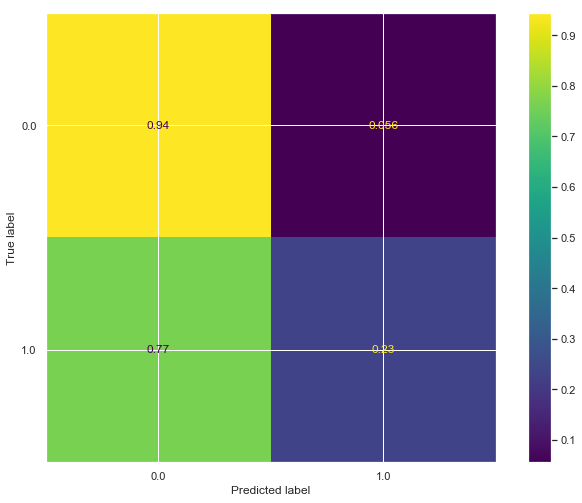

size              3.000000
train_accuracy    0.937988
test_accuracy     0.902937
Name: 1, dtype: float64


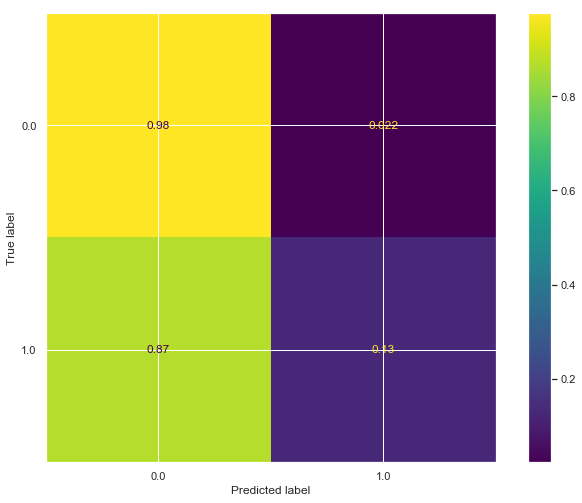

size              5.000000
train_accuracy    0.926630
test_accuracy     0.905948
Name: 2, dtype: float64


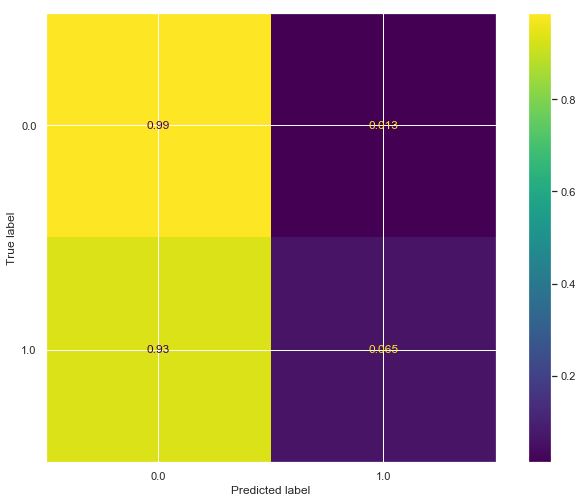

size              7.000000
train_accuracy    0.921931
test_accuracy     0.908685
Name: 3, dtype: float64


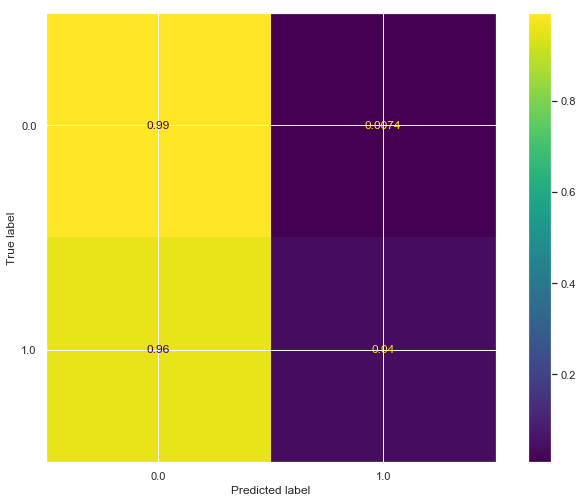

size              9.000000
train_accuracy    0.919354
test_accuracy     0.910691
Name: 4, dtype: float64


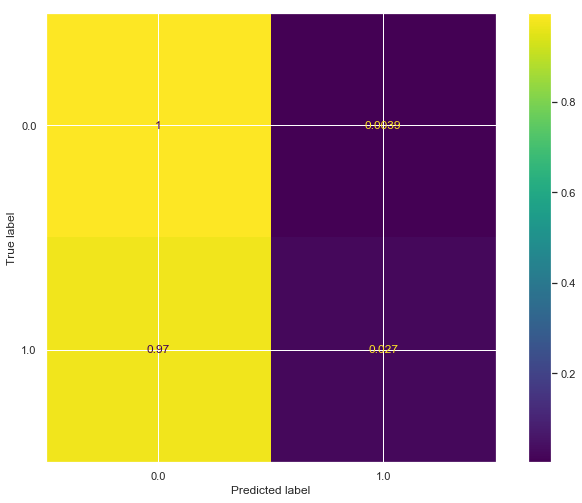

size              11.000000
train_accuracy     0.918282
test_accuracy      0.911056
Name: 5, dtype: float64


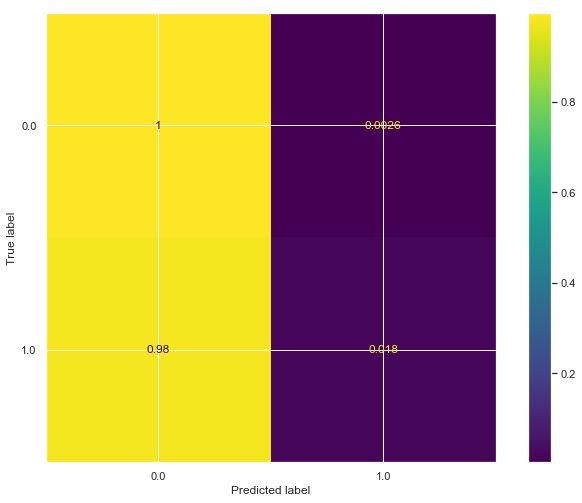

size              13.000000
train_accuracy     0.917780
test_accuracy      0.911604
Name: 6, dtype: float64


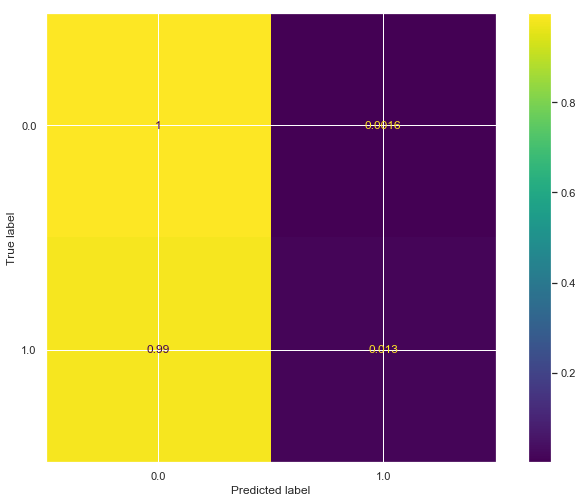

size              15.000000
train_accuracy     0.917119
test_accuracy      0.911877
Name: 7, dtype: float64


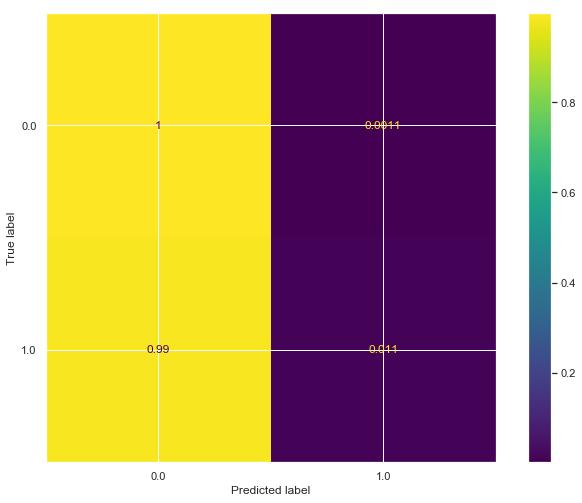

size              17.000000
train_accuracy     0.916663
test_accuracy      0.912334
Name: 8, dtype: float64


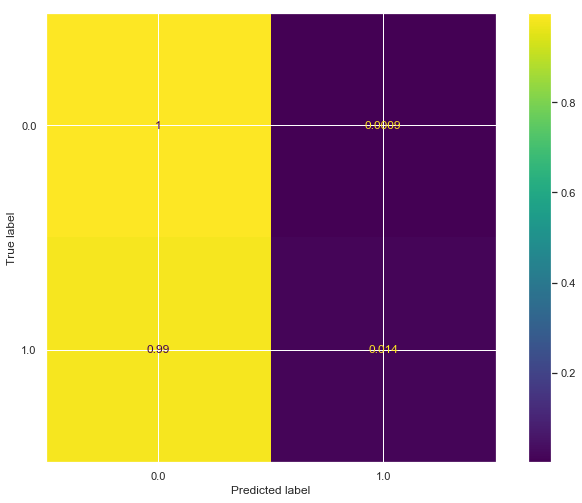

size              19.000000
train_accuracy     0.916412
test_accuracy      0.912425
Name: 9, dtype: float64


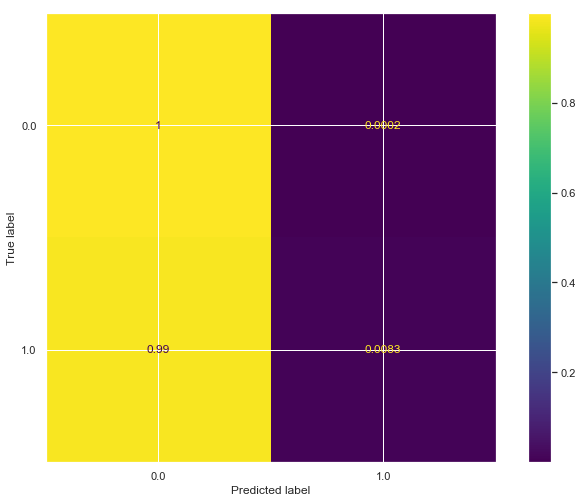

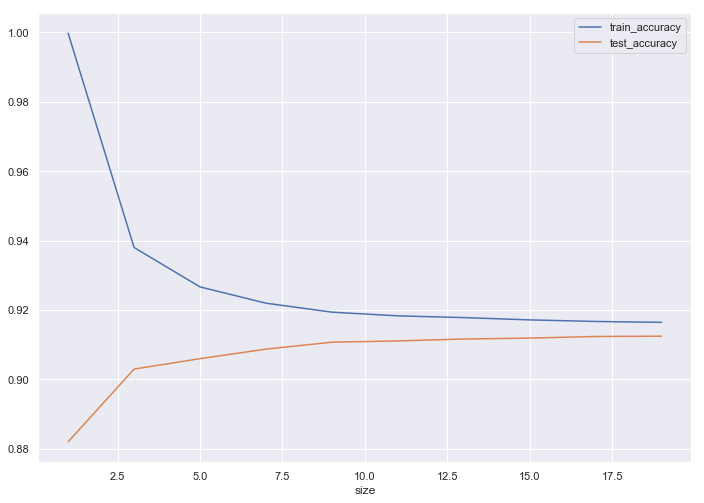

   size  train_accuracy  test_accuracy
0   1.0        0.999772       0.881956
1   3.0        0.937988       0.902937
2   5.0        0.926630       0.905948
3   7.0        0.921931       0.908685
4   9.0        0.919354       0.910691
5  11.0        0.918282       0.911056
6  13.0        0.917780       0.911604
7  15.0        0.917119       0.911877
8  17.0        0.916663       0.912334
9  19.0        0.916412       0.912425


In [24]:
accuracies = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})

for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    
    x_score = knn.score(x_train, y_train)
    y_score = knn.score(x_test, y_test)
        
    accuracies = accuracies.append({'size':i,'train_accuracy':x_score,
                                 'test_accuracy':y_score}, ignore_index=True)
    print(accuracies.iloc[-1])
    
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        normalize='true'
    )
    
    disp.confusion_matrix
    plt.show()

accuracies.plot(x = 'size', y = ['train_accuracy', 'test_accuracy'])    
plt.show()
print(accuracies)

size              1.000000
train_accuracy    0.999772
test_accuracy     0.881956
Name: 0, dtype: float64


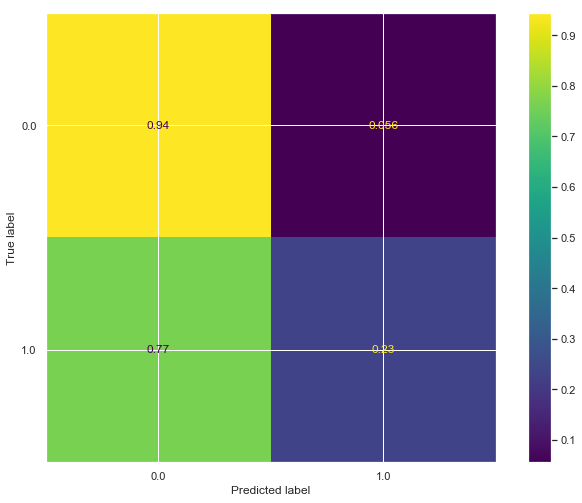

size              2.000000
train_accuracy    0.935251
test_accuracy     0.910144
Name: 1, dtype: float64


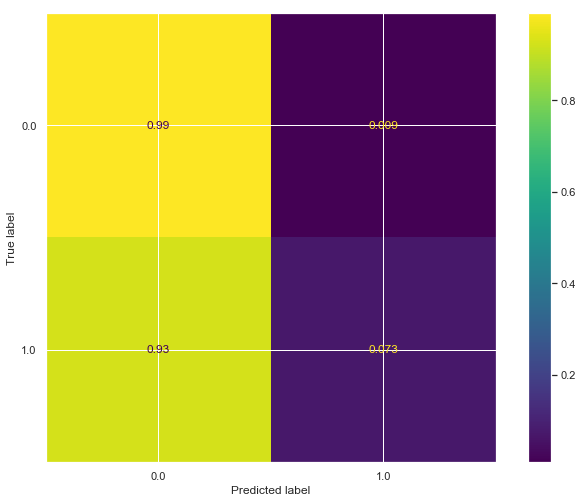

size              3.000000
train_accuracy    0.937988
test_accuracy     0.902937
Name: 2, dtype: float64


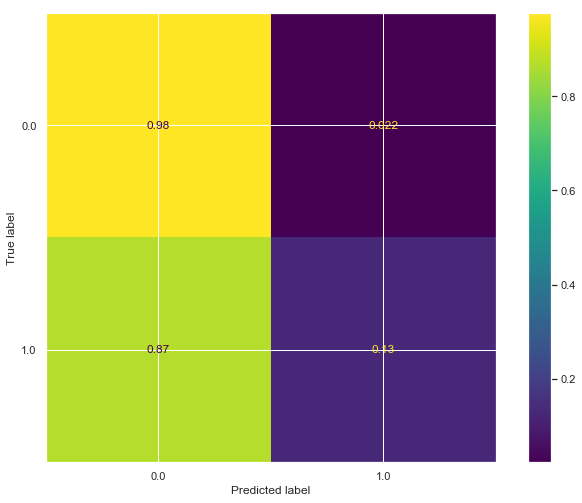

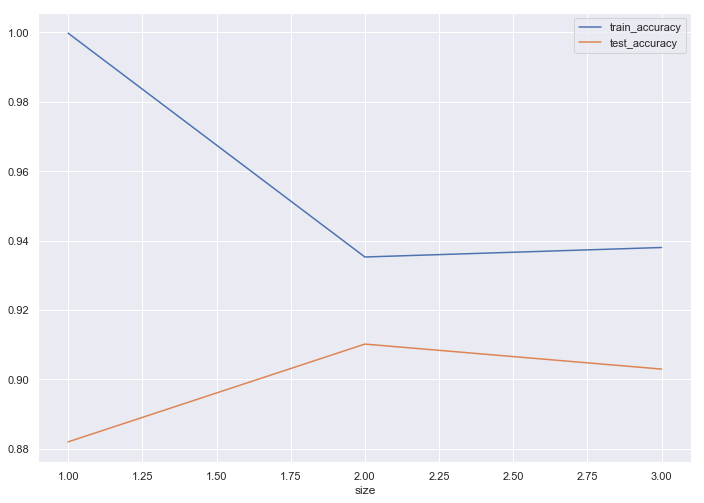

   size  train_accuracy  test_accuracy
0   1.0        0.999772       0.881956
1   2.0        0.935251       0.910144
2   3.0        0.937988       0.902937


In [25]:
accuracies = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})

for i in range(1,4,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    
    x_score = knn.score(x_train, y_train)
    y_score = knn.score(x_test, y_test)
        
    accuracies = accuracies.append({'size':i,'train_accuracy':x_score,
                                 'test_accuracy':y_score}, ignore_index=True)
    print(accuracies.iloc[-1])
    
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        normalize='true'
    )
    
    disp.confusion_matrix
    plt.show()

accuracies.plot(x = 'size', y = ['train_accuracy', 'test_accuracy'])    
plt.show()
print(accuracies)

## 8. Выводы
Из-за сильной несбалансированности классов, высокая точность достигается за счет отказа всем работникам в повышении. Так как неповышенных больше 92%, то теряется значимость человека получившего повышение (1 среди 11 сильно теряется). Поэтому метод к-ближайших соседей работает лучше всего с наименьшим их количеством.

## 9. Запуск других классификаторов
### Случайный лес

In [26]:
from sklearn.ensemble import RandomForestClassifier

train accuracy : 0.9997491219267436
test accuracy : 0.9330414158000365


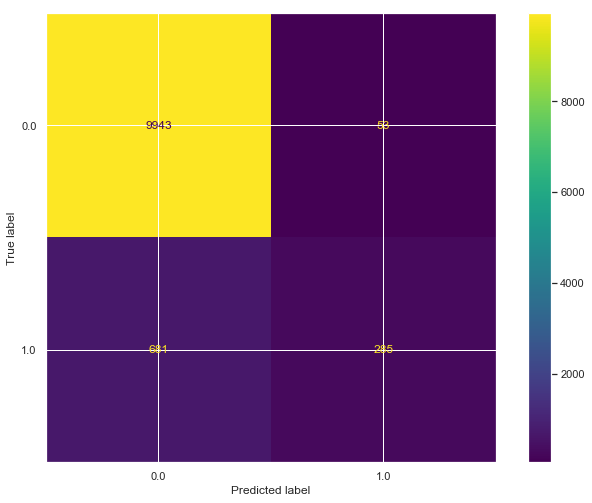

In [27]:
rfc = RandomForestClassifier() # class_weight='balanced'
rfc.fit(x_train, y_train.values.ravel())
print("train accuracy :", rfc.score(x_train, y_train))
print("test accuracy :", rfc.score(x_test, y_test))

disp = ConfusionMatrixDisplay.from_estimator(rfc, x_test, y_test)
disp.confusion_matrix
plt.show()

### Support Vector Machines — SVM
Метод опорных векторов

train accuracy : 0.9314418647082973
test accuracy : 0.9258347016967706


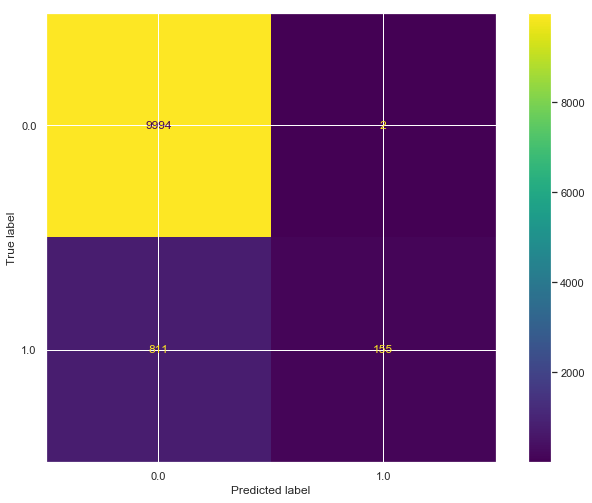

In [28]:
from sklearn import svm

clf = svm.SVC() 
clf.fit(x_train, y_train.values.ravel())
print("train accuracy :", clf.score(x_train, y_train))
print("test accuracy :", clf.score(x_test, y_test))

disp = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)
disp.confusion_matrix
plt.show()

### Principal Component Analysis - PCA
Метод главных компонент  
Рассмотрим зависимость точности классификатора от количества компонент

In [29]:
from sklearn.decomposition import PCA

In [30]:
accuracies = pd.DataFrame({'size':[],'train_accuracy_pca':[],'test_accuracy_pca':[], "is_promoted_true_pred":[]})
rfc = RandomForestClassifier(class_weight='balanced')
for i in range(24, 0, -1):
    pca = PCA(n_components=i)
    pca_x = pca.fit_transform(x_train)
    
    x_tr, x_te, y_tr, y_te = train_test_split(pca_x, y_train, test_size = 0.25, random_state = 17)
    
    rfc.fit(x_tr, y_tr.values.ravel())
    accuracies  = accuracies.append({'size':i,'train_accuracy_pca':rfc.score(x_tr, y_tr),
                               'test_accuracy_pca':rfc.score(x_te, y_te),
                               "is_promoted_true_pred":confusion_matrix(y_te,rfc.predict(x_te),normalize='true')[1,1]},ignore_index=True)

print(accuracies)

    size  train_accuracy_pca  test_accuracy_pca  is_promoted_true_pred
0   24.0            0.999757           0.919996               0.144385
1   23.0            0.999787           0.919905               0.144385
2   22.0            0.999757           0.919723               0.145455
3   21.0            0.999726           0.919358               0.140107
4   20.0            0.999818           0.920361               0.147594
5   19.0            0.999787           0.920635               0.152941
6   18.0            0.999757           0.920452               0.152941
7   17.0            0.999818           0.921638               0.164706
8   16.0            0.999787           0.922186               0.166845
9   15.0            0.999757           0.921456               0.167914
10  14.0            0.999787           0.921365               0.162567
11  13.0            0.999726           0.921730               0.174332
12  12.0            0.999787           0.920179               0.166845
13  11

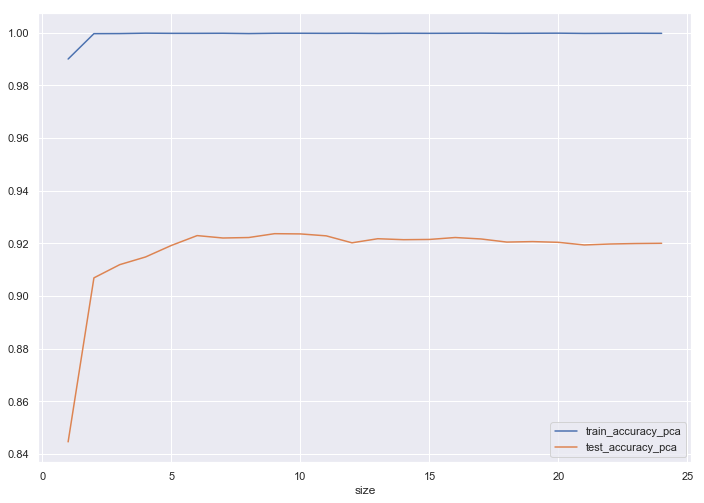

In [31]:
accuracies.plot(x = 'size', y = ['train_accuracy_pca', 'test_accuracy_pca'])    
plt.show()

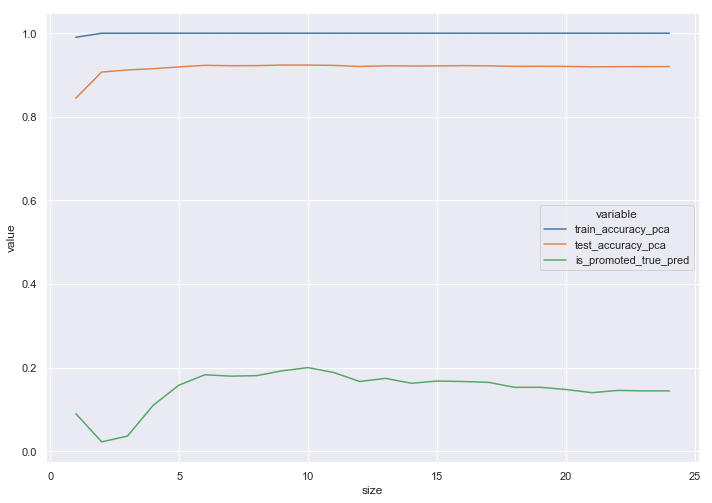

In [33]:
sns.lineplot(x='size', y='value', hue='variable', data=pd.melt(accuracies, ['size']))
pass

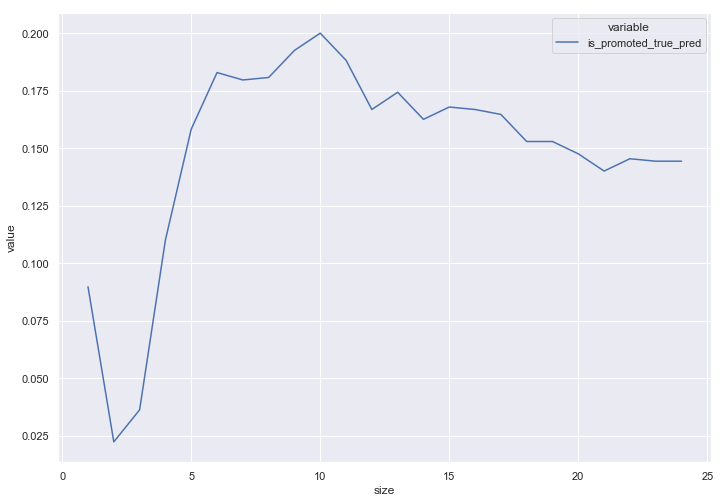

In [34]:
sns.lineplot(x='size', y='value', hue='variable', data=pd.melt(accuracies, ['size','train_accuracy_pca','test_accuracy_pca']))
pass

## 10. Несбалансированность классов

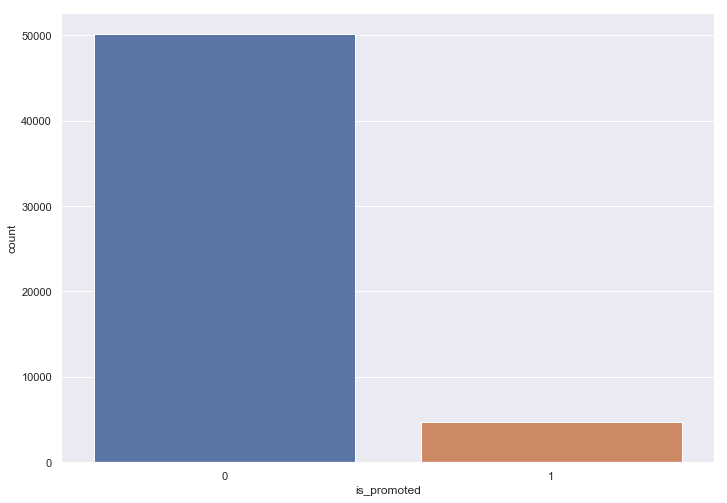

In [35]:
is_promoted_counts = data["is_promoted"].value_counts()
sns.countplot(x="is_promoted", order=is_promoted_counts.index, data=data)
pass

In [36]:
is_promoted_values = is_promoted_counts.values
print(f"Несбалансированность классов {100*is_promoted_values[0]/shape[0]:.1f}:{100*is_promoted_values[1]/shape[0]:.1f}")

Несбалансированность классов 91.5:8.5


#### Побеждаем несбалансированность

x train resampled: (80288, 57)
y extended : (80288, 1)


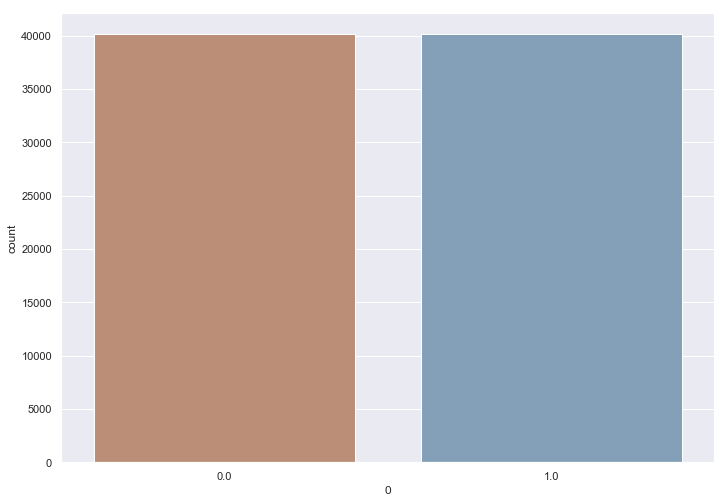

In [37]:
from imblearn.over_sampling import SMOTE

x_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train, y_train.values.ravel())
x_train_resampled = pd.DataFrame(x_train_resampled)
y_train_resampled = pd.DataFrame(y_train_resampled)

x_train_resampled
y_train_resampled

print(f"x train resampled: {x_train_resampled.shape}")
print("y extended :", y_train_resampled.shape)

sns.countplot(x = 0, data = y_train_resampled, palette = 'twilight_shifted_r')
pass

size              1.000000
train_accuracy    0.999875
test_accuracy     0.864623
Name: 0, dtype: float64


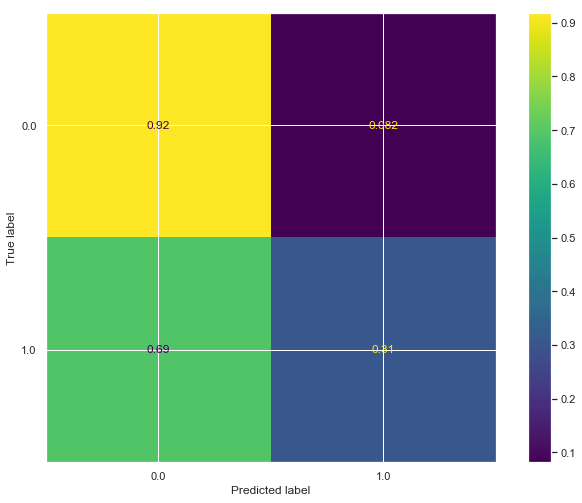

size              3.000000
train_accuracy    0.963095
test_accuracy     0.835067
Name: 1, dtype: float64


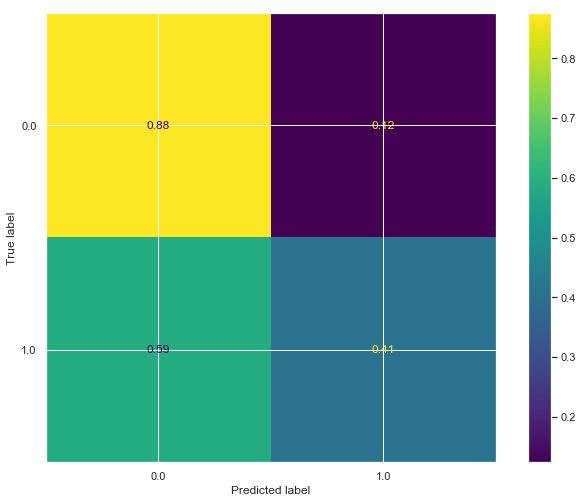

size              5.000000
train_accuracy    0.940228
test_accuracy     0.812261
Name: 2, dtype: float64


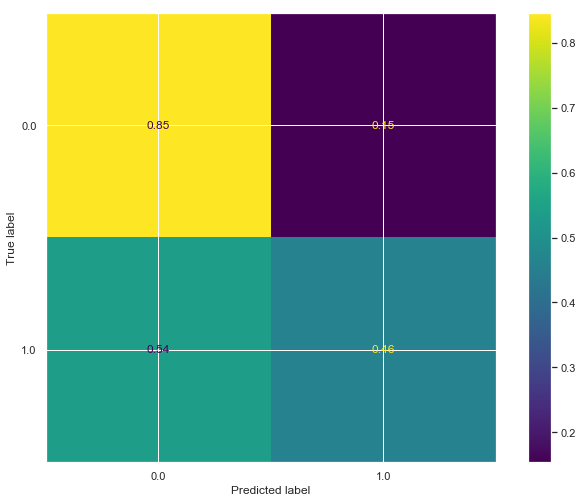

size              7.000000
train_accuracy    0.923002
test_accuracy     0.792739
Name: 3, dtype: float64


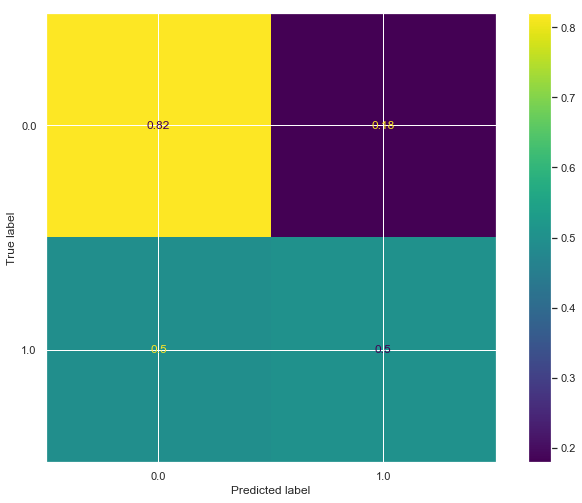

size              9.000000
train_accuracy    0.908168
test_accuracy     0.780606
Name: 4, dtype: float64


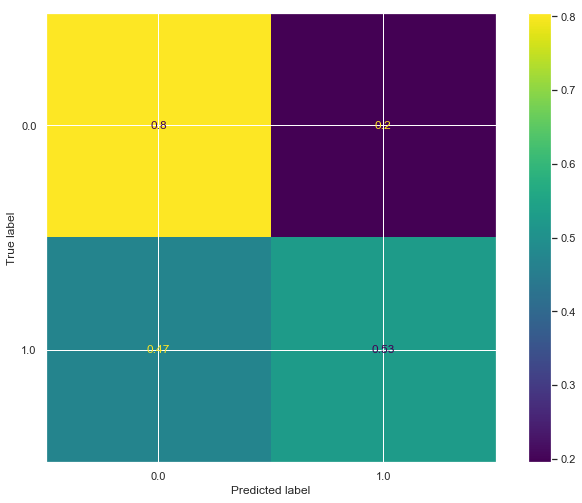

size              11.000000
train_accuracy     0.894903
test_accuracy      0.769020
Name: 5, dtype: float64


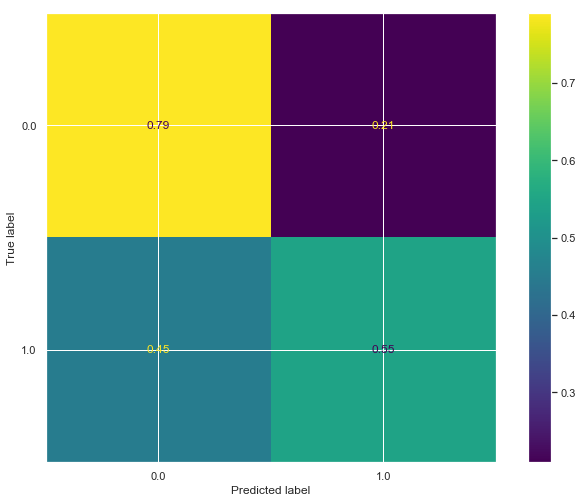

size              13.000000
train_accuracy     0.882660
test_accuracy      0.758438
Name: 6, dtype: float64


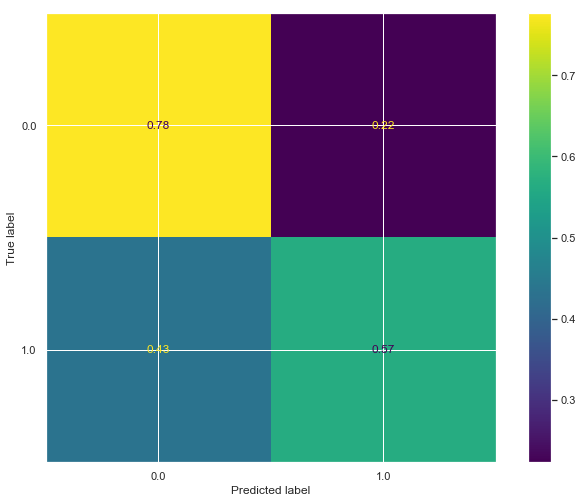

size              15.000000
train_accuracy     0.870753
test_accuracy      0.747035
Name: 7, dtype: float64


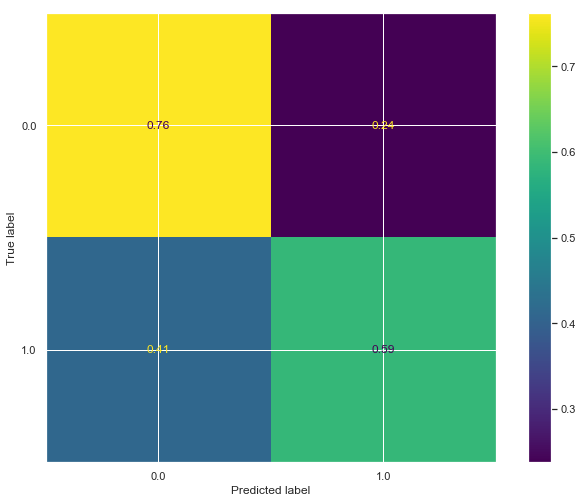

size              17.000000
train_accuracy     0.860427
test_accuracy      0.737730
Name: 8, dtype: float64


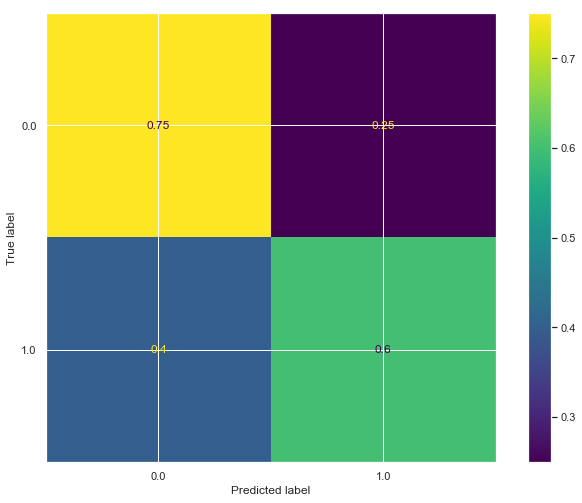

size              19.000000
train_accuracy     0.851447
test_accuracy      0.729976
Name: 9, dtype: float64


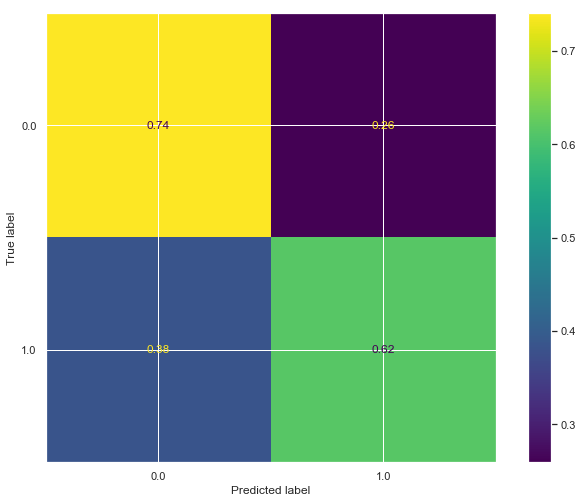

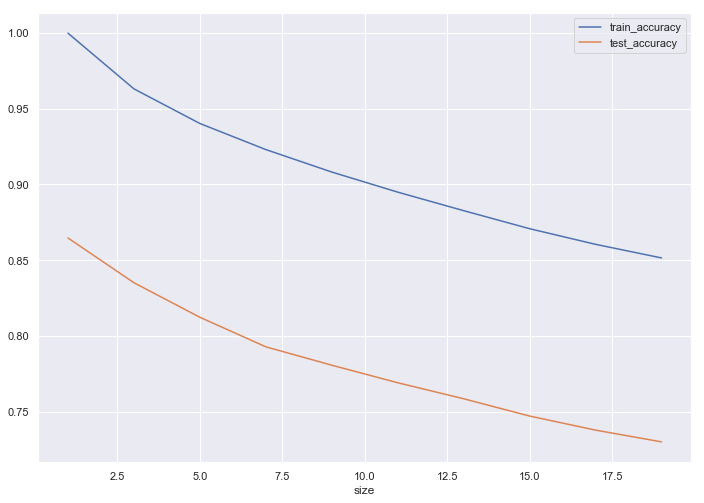

   size  train_accuracy  test_accuracy
0   1.0        0.999875       0.864623
1   3.0        0.963095       0.835067
2   5.0        0.940228       0.812261
3   7.0        0.923002       0.792739
4   9.0        0.908168       0.780606
5  11.0        0.894903       0.769020
6  13.0        0.882660       0.758438
7  15.0        0.870753       0.747035
8  17.0        0.860427       0.737730
9  19.0        0.851447       0.729976


In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
accuracies = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})

for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_resampled, y_train_resampled.values.ravel())
    
    x_score = knn.score(x_train_resampled, y_train_resampled)
    y_score = knn.score(x_test, y_test)
        
    accuracies = accuracies.append({'size':i,'train_accuracy':x_score,
                                 'test_accuracy':y_score}, ignore_index=True)
    print(accuracies.iloc[-1])
    
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        normalize='true'
    )
    
    disp.confusion_matrix
    plt.show()

accuracies.plot(x = 'size', y = ['train_accuracy', 'test_accuracy'])    
plt.show()
print(accuracies)

size              1.000000
train_accuracy    0.999875
test_accuracy     0.864623
Name: 0, dtype: float64


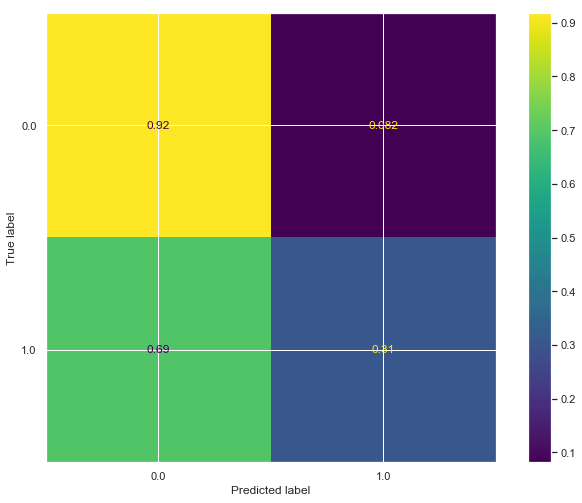

size              2.000000
train_accuracy    0.991344
test_accuracy     0.873746
Name: 1, dtype: float64


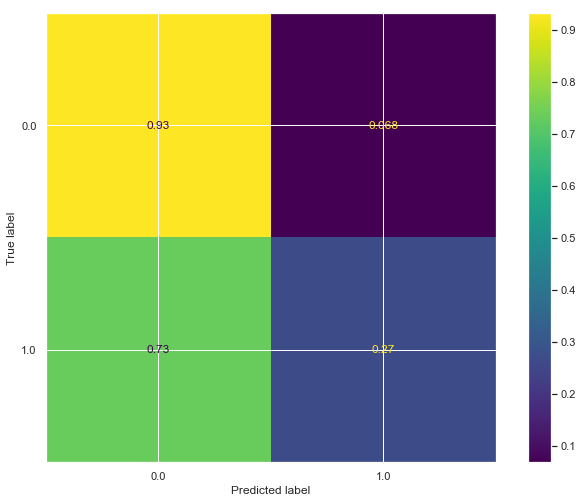

size              3.000000
train_accuracy    0.963095
test_accuracy     0.835067
Name: 2, dtype: float64


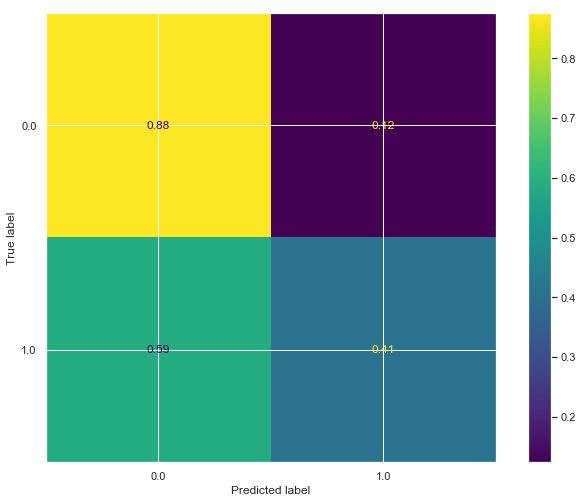

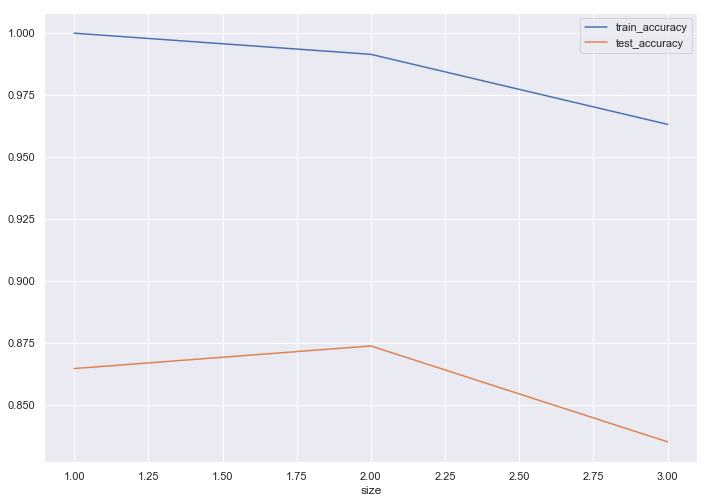

   size  train_accuracy  test_accuracy
0   1.0        0.999875       0.864623
1   2.0        0.991344       0.873746
2   3.0        0.963095       0.835067


In [39]:
accuracies = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})

for i in range(1,4,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_resampled, y_train_resampled.values.ravel())
    
    x_score = knn.score(x_train_resampled, y_train_resampled)
    y_score = knn.score(x_test, y_test)
        
    accuracies = accuracies.append({'size':i,'train_accuracy':x_score,
                                 'test_accuracy':y_score}, ignore_index=True)
    print(accuracies.iloc[-1])
    
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        normalize='true'
    )
    
    disp.confusion_matrix
    plt.show()

accuracies.plot(x = 'size', y = ['train_accuracy', 'test_accuracy'])    
plt.show()
print(accuracies)

size              1.000000
train_accuracy    0.999875
test_accuracy     0.864623
Name: 0, dtype: float64


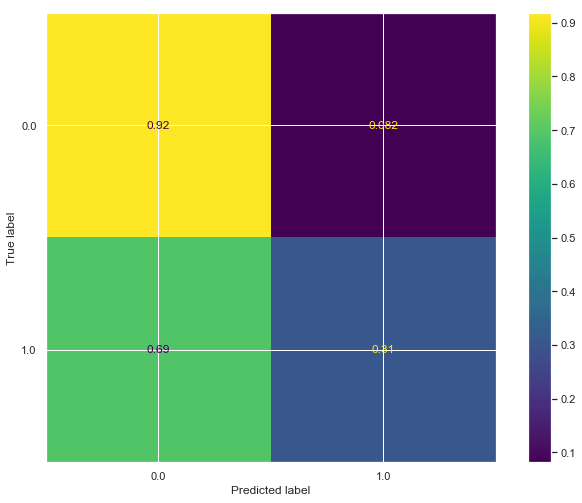

size              11.000000
train_accuracy     0.894903
test_accuracy      0.769020
Name: 1, dtype: float64


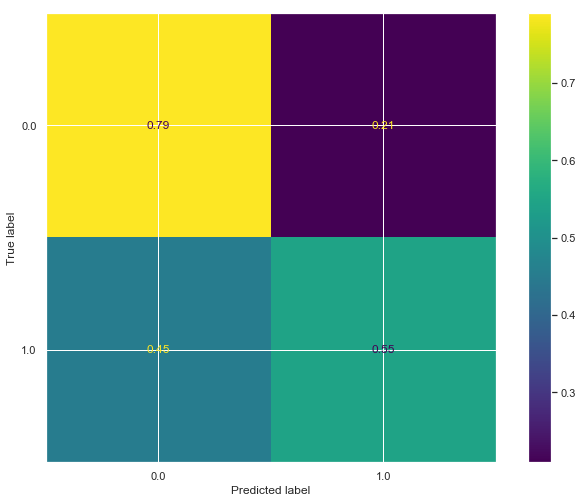

size              21.000000
train_accuracy     0.842903
test_accuracy      0.723773
Name: 2, dtype: float64


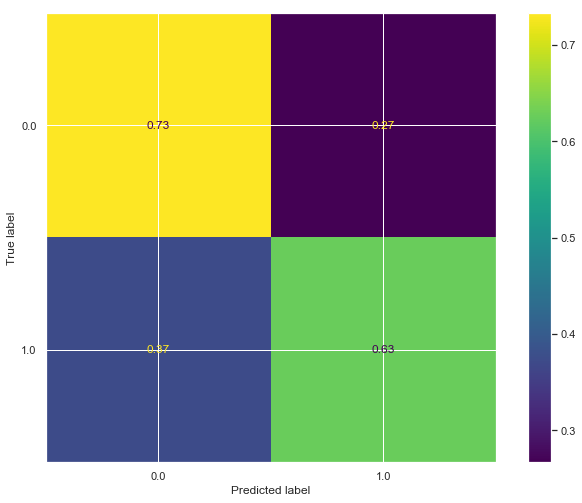

size              31.000000
train_accuracy     0.812488
test_accuracy      0.694946
Name: 3, dtype: float64


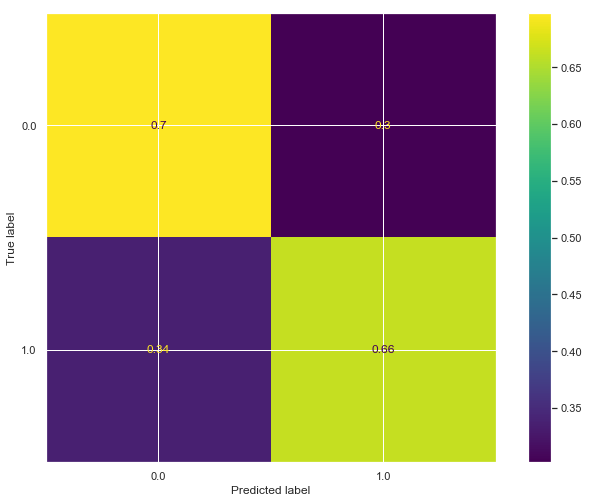

size              41.000000
train_accuracy     0.791550
test_accuracy      0.672231
Name: 4, dtype: float64


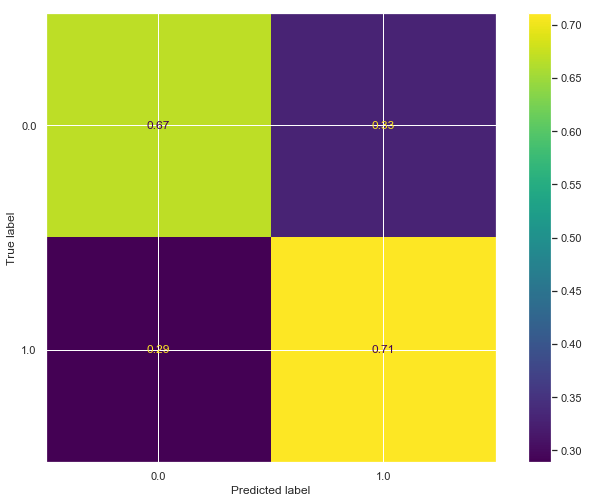

size              51.000000
train_accuracy     0.777040
test_accuracy      0.651523
Name: 5, dtype: float64


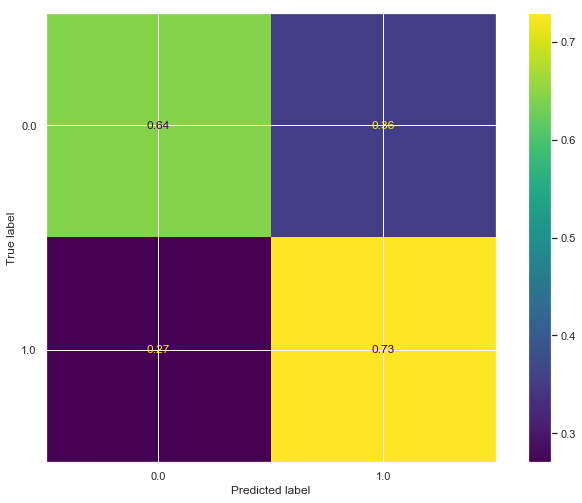

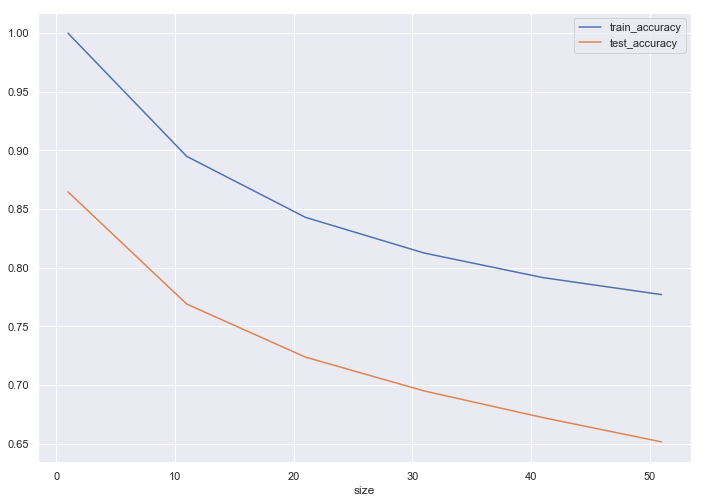

   size  train_accuracy  test_accuracy
0   1.0        0.999875       0.864623
1  11.0        0.894903       0.769020
2  21.0        0.842903       0.723773
3  31.0        0.812488       0.694946
4  41.0        0.791550       0.672231
5  51.0        0.777040       0.651523


In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
accuracies = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})

for i in range(1,55,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_resampled, y_train_resampled.values.ravel())
    
    x_score = knn.score(x_train_resampled, y_train_resampled)
    y_score = knn.score(x_test, y_test)
        
    accuracies = accuracies.append({'size':i,'train_accuracy':x_score,
                                 'test_accuracy':y_score}, ignore_index=True)
    print(accuracies.iloc[-1])
    
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        normalize='true'
    )
    
    disp.confusion_matrix
    plt.show()

accuracies.plot(x = 'size', y = ['train_accuracy', 'test_accuracy'])    
plt.show()
print(accuracies)

На сбалансированном датасете kNN классификатор показал общую точность хуже, чем на несбалансированным.  
Предсказания не повышений упали с (94-100)% до (74-92)%. Точность предсказания повышений поднялась с (1-23)% до (31-61)%.
Снижение точности связано из-за изменения исходного распределения выборки, из-за чего пывышались те, кто не должен был.

## 11. Исключение коррелированных переменных
В датасете была 2 коррелированных критерия со значением около 0.6: возвраст, стаж.  
Поскольку значение не сильно большое, исключать эти переменные нет большой нужды.  
Поэтому нельзя сказать что одно зависит от другого и дублирует критерии, но это достаточно вероятно.
## 12. Общие выводы

Классификатор KNN, в рамках данной задачи, подходит плохо так как не учитывает внутренние признаки, а производит сравнение с соседями, из-за чего крайне трудно определить к какому классу отнести человека, если при обучении имеются схожие классы.  

Классификатор K ближайших соседей крайней прожорлив в плане производительности, что вызывает проблематичность его использование на нынешней конфигурации пк и с текущем размером датасета в несколько десятков тысяч записей.


train_accuracy: 0.99988 ≠ 1 при k=1 говорит о наличии нескольких схожих(одинаковых) данных но принадлежащих разным классам. Это может быть связано с заполнением пропущенных значений.   

Балансировка классаов, с одной стороны, улучшила ситуацию с предсказанием повешения, с другой стороны, ухудшила с отказом в повешении, выдавая повышения тем, кому повышение не ожидалось. Так как на практике количество людей, которых не повысили, значительно больше, то балансировка датасета ухудшила оценку для реальных результатов, сильно увеличив ошибку 2 рода.  

В датасете было 2 коррелированных критерия со значением около 0.6: возвраст, стаж.  
Поскольку значение не сильно большое, исключать эти переменные нет большой нужды.  
Сложно сказать, зависит ли одно от другого и дублирует критерии, однако, это достаточно вероятно.

По гистограммам регионов можно предположить, что в каждом из них повышается примерно одинаковая доля сотрудников, однако критерий не был исключен, так как численность человек в них различна и было предположение, что это может повлиять на результат.  

Результаты классификаторов (test accuracy)

| Классификатор |   test accuracy |
| ------------- |:---------------:|
| KNN           |   0.912         |
| Случайный лес |   0.933         |
| SVM           |   0.926         |
| PCA           |   0.925         |

Для решения данной задачи лучше всего подходит "Случайный лес". Несмотря на то, что задача многокритериальная, большая часть признаков была приобразована к бинарному виду, а остальные нормализованны, из-за чего можно было преминить нейросеть и получить хорошие результаты.

По результатам видно, что точно решить данную задачу по имеющимся признакам нельзя, так как не понятьно по каким критериям можно точно определить повышение и отказ в каждом случае. Есть даже люди со схожими характеристиками, даже с совпадающими, пренадлижащих разным классам. В целом, это не удивительно, так как данные не отражают субъективную оценку начальства к конкретному человеку. Это можно увидеть в данных, что человек с более низкими характеристиками получает повышение, а с более высокими нет. Причем есть различные комбинации для определения какая характеристика приводит к повышению, а какая нет. По этой причине можно постоить классификатор, который исключит личное отношение начальства к конкретному человеку, выдавая рекомендации кого повысить, кто был повышен "незаслуженно" и на кого нужно обратить внимание для расматрения на повышение.

# Обучение полносвязной неглубокой нейронной сети
## 1. Снова чтение и подготовка данных


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


Теперь пропущенных значений нет: 
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0.835754,0.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.831960,1.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095942,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.032453,1.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625107,1.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


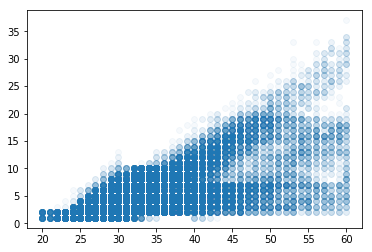

In [16]:
import numpy as np              
import matplotlib.pyplot as plt 
#%matplotlib inline 

import pandas as pd             
import seaborn as sns           
import sklearn                  

data = pd.read_csv('train.csv', sep = ',', engine = 'python')
display(data)

# обработка пропущенных значений  
data.fillna(data.median(numeric_only = True, axis = 0), axis=0 , inplace=True)
data['education'].fillna(data['education'].mode().iloc[0], inplace=True)

print(f"Теперь пропущенных значений нет: \n{data.isna().sum()}")

# обработка категориальных признаков
data.columns

for coll in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
    data[coll] = data[coll].astype('category')

plt.scatter(data['age'], data['length_of_service'], alpha = .04)
pass

data['gender'] = data['gender'].cat.codes

Department_dummies = pd.get_dummies(data['department'], prefix = 'department')
Education_dummies = pd.get_dummies(data['education'], prefix = 'education')
Recruitment_channel_dummies = pd.get_dummies(data['recruitment_channel'], prefix = 'recruitment_channel')
Region_dummies = pd.get_dummies(data['region'])

data = pd.concat((data, Department_dummies), axis=1)
data = data.drop(['department'], axis=1)

data = pd.concat((data, Education_dummies), axis=1)
data = data.drop(['education'], axis=1)

data = pd.concat((data, Recruitment_channel_dummies), axis=1)
data = data.drop(['recruitment_channel'], axis=1)

data = pd.concat((data, Region_dummies), axis=1)
data = data.drop(['region'], axis=1)

data.head()

# нормализация данных
data_stand = (data - data.min(axis = 0))/(data.max(axis = 0)-data.min(axis = 0))
data_stand.describe()
data_stand.head()


## 2. Разбиваем данные на обучающую и тестовую выборки

In [17]:
data_stand.columns
data_stand.isna().sum()
data_stand.head()

data_stand = data_stand.drop(['employee_id'], axis = 1)

Y = data_stand[['is_promoted']]
X = data_stand.drop(['is_promoted'], axis=1)
print(f"x:{X.shape} \n y:{Y.shape}")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)
print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x:(54808, 57) 
 y:(54808, 1)
x_train:  (43846, 57)
x_test  (10962, 57)
y_train:  (43846, 1)
y_test:  (10962, 1)


## 3. Обучаем классификатор

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, ),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter = 2000,
                          random_state = 42)

In [36]:
%%time
mlp_model.fit(x_train,  y_train.values.ravel())

Wall time: 7min 57s


MLPClassifier(activation='logistic', max_iter=2000, random_state=42,
              solver='lbfgs')

## 4. Проверяем качество классификатора

In [37]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

<b>Ошибки на обучающей и тестовой выборках:</b>

In [38]:
print(mlp_model.score(x_train, y_train), mlp_model.score(x_test, y_test))
print(1 - mlp_model.score(x_test, y_test))

0.9547279113260047 0.9261083743842364
0.07389162561576357


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9547279113260047

In [40]:
accuracy_score(y_test, y_test_pred)

0.9261083743842364

### Подбор гипер параметров
Подберем оптимальное значение параметра регуляризации alpha

In [48]:
import warnings
warnings.filterwarnings('ignore')

alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []


for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, ), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=500, random_state = 42)
    mlp_model.fit(x_train, y_train.values.ravel())

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1 - mlp_model.score(x_train, y_train))
    test_err.append(1 - mlp_model.score(x_test, y_test))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    print(f"ready for alpha = {alpha}")

ready for alpha = 0.001
ready for alpha = 0.0017782794100389228
ready for alpha = 0.0031622776601683794
ready for alpha = 0.005623413251903491
ready for alpha = 0.01
ready for alpha = 0.01778279410038923
ready for alpha = 0.03162277660168379
ready for alpha = 0.05623413251903491
ready for alpha = 0.1
ready for alpha = 0.1778279410038923
ready for alpha = 0.31622776601683794
ready for alpha = 0.5623413251903491
ready for alpha = 1.0
ready for alpha = 1.7782794100389228
ready for alpha = 3.1622776601683795
ready for alpha = 5.623413251903491
ready for alpha = 10.0
ready for alpha = 17.78279410038923
ready for alpha = 31.622776601683793
ready for alpha = 56.23413251903491
ready for alpha = 100.0


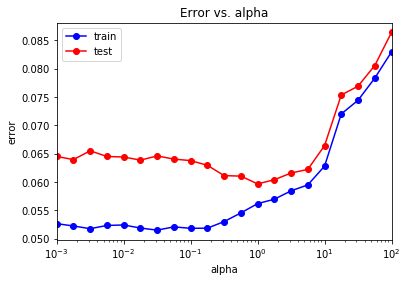

In [49]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

<b>Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:</b>

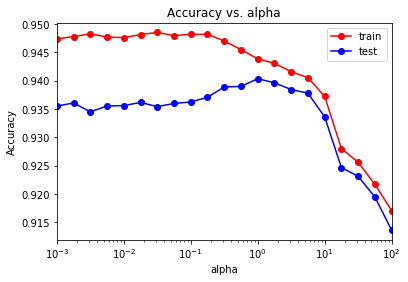

In [50]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [51]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0514984263102678 0.05966064586754238


Оптимальное значение alpha:

In [52]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.]


### Классификатор при найденном оптимальном значении alpha:

In [53]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

print(1 - mlp_model.score(x_train, y_train))
print(1 - mlp_model.score(x_test, y_test))

0.057268621995164914
0.06048166392993981


In [54]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9427313780048351
0.9395183360700602


### Матрица рассогласования:

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[9985  652]
 [  11  314]]


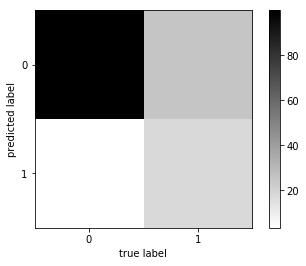

In [56]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [57]:
from sklearn.metrics import plot_confusion_matrix

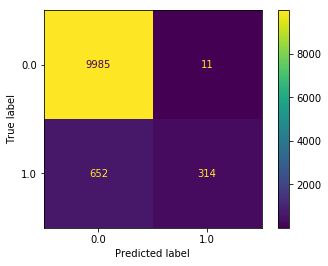

In [59]:
plot_confusion_matrix(mlp_model, x_test, y_test) 

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      9996
         1.0       0.97      0.33      0.49       966

    accuracy                           0.94     10962
   macro avg       0.95      0.66      0.73     10962
weighted avg       0.94      0.94      0.93     10962



## Вывод
В ходе обучения, 500 и 1000 итераций было недостаточно для окончательного обучения, исходя из появлявшихся warning'ов.
Для обучения классификатора было достаточно 2000 итераций.

При подборе параметра регуляризации alpha была схожая проблема с недостатком количества итераций.
Так как в задаче c K-ближайшими соседями было установлено, что есть сотрудники с одинаковыми или очень схожими показателями, но принадлижащие разным класса, то, возможно, что именно из-за этого невозможно добиться 0 ошибки при тренировке.

В данной задаче нейросеть показывает результаты сравнимые с классификатором K-ближайших соседей. В обоих случаях хорошие показатели обусловлены в основном отсутствием повышения большей части кандидатов по карьерной лестнице. 

Лучшее обучение было при alpha = 1.  
accuracy на тестовой выборке равнен 0.94, что лучше чем в случае K-ближайших соседей ~ 0.91